In [799]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

import itertools

In [800]:
def noise_out(time_counts):
    return 2 * np.sin(2 * np.pi * 7 * time_counts)

In [801]:
def noise_in(time_counts):
    return 0.5 * np.sin(2 * np.pi * 7 * time_counts)

In [802]:
def useful_signal(time_counts):
    return 10 * np.sin(2 * np.pi * 2 * time_counts)

In [803]:
t = np.linspace(0, 10, 1000, endpoint=False)

first_input = noise_out(t)
second_output = noise_in(t) + useful_signal(t)

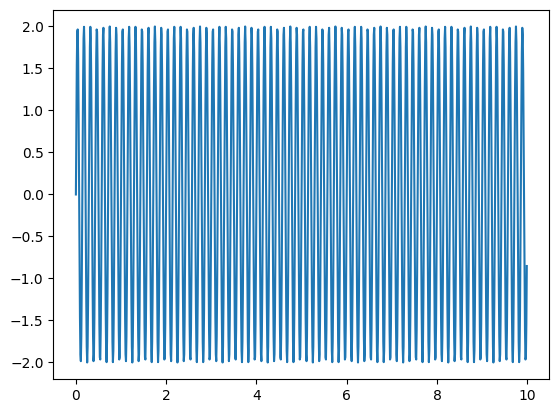

In [804]:
plt.plot(t, first_input)
plt.show()

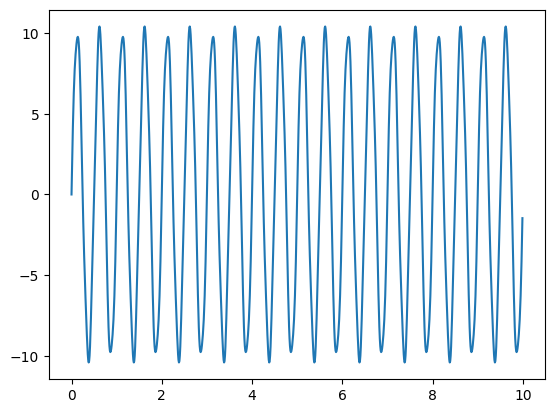

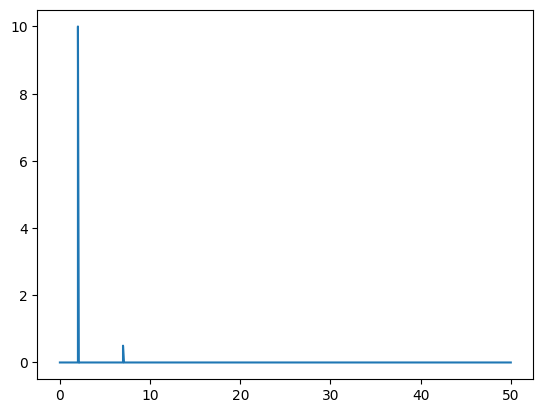

In [805]:
plt.plot(t, second_output)
plt.show()
plt.plot(fftpack.rfftfreq(second_output.size, 10 / 1000), 2 * np.abs(fftpack.rfft(second_output)) / second_output.size)
plt.show()

Определим длину вектора высовых коэффициентов свертки

In [806]:
number_of_weights = 5

In [807]:
# weights = np.random.random(number_of_weights)
weights = np.ones(number_of_weights)

In [808]:
alfa = 0.02

In [809]:
for i in range(len(second_output[number_of_weights - 1:])):
    first_input_k = first_input[i:number_of_weights + i]
    second_output_k = second_output[number_of_weights - 1]

    p = second_output_k * first_input_k

    r = np.empty((number_of_weights, number_of_weights))

    for i in range(number_of_weights):
        for j in range(number_of_weights):
            r[i, j] = first_input_k[i] * first_input_k[j]

    grad_J = -2 * (p - 2 * r.dot(weights))

    weights -= alfa * grad_J

In [810]:
def processing_of_signal(input, weights):
    output = np.zeros_like(input)
    number_of_weights = weights.size

    for i in range(output.size - number_of_weights + 1):
        output[number_of_weights - 1 + i] = (input[i:number_of_weights + i] * weights).sum()

    return output

In [811]:
all_spectrum = np.zeros(t.size)
all_spectrum[int(t.size / 2)] = 1
approx_noise_in = processing_of_signal(first_input, weights)

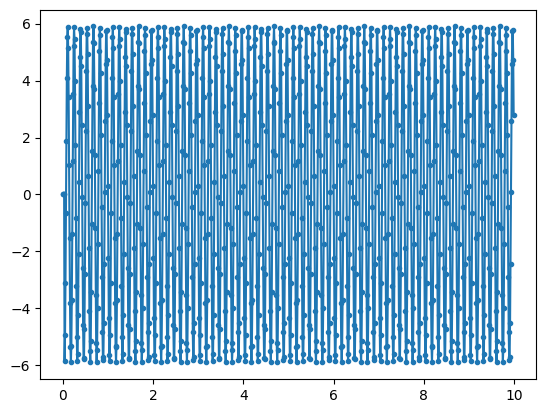

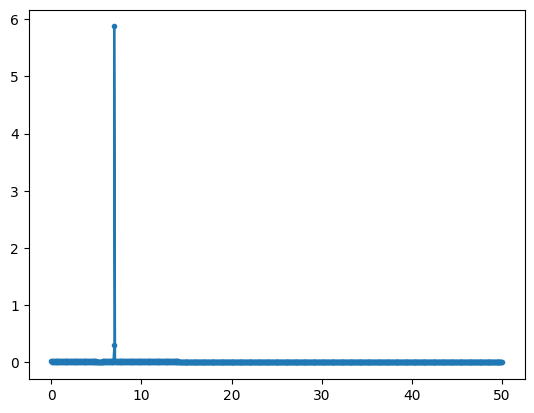

In [812]:
plt.plot(t, approx_noise_in, ".-")
plt.show()
plt.plot(fftpack.rfftfreq(approx_noise_in.size, 10 / 1000), 2 * np.abs(fftpack.rfft(approx_noise_in)) / approx_noise_in.size, ".-")
plt.show()